<h1 align="center">Assignment 4</h1>
<h2 align="center">Programming Machine Learning Applications [DSC 478]</h2>
<h3 align="center">Jonesh Shrestha (2222011)</h3>


In [56]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from itemBasedRec import *

### 1. **Item-Based Joke Recommendation**

#### For this problem you will use a modified version of the item-based recommender algorithm from Ch. 14 of Machine Learning in Action and use it on joke ratings data based on Jester Online Joke Recommender System. The modified version of the code is provided in the module itemBasedRec.py. Most of the module will be used as is, but you will add some additional functionality. The data set contains two files. The file "**modified_jester_data.csv**" contains the ratings on 100 jokes by 1000 users (each row is a user profile). The ratings have been normalized to be between 1 and 21 (a 20-point scale), with 1 being the lowest rating. A zero indicated a missing rating. The file "**jokes.csv**" contains the joke ids mapped to the actual text of the jokes. Your tasks in this problem are the following.


#### a. **[10 pts]** Load in the joke ratings data and the joke text data into appropriate data structures. Use the "**recommend**" function to provide top 5 joke recommendations for **users with id 117** using both **Pearson and cosine similarity** measures. Note the differences. Use the standard item-based collaborative filtering (based on the rating prediction function "**standEst**"). Next, find the top 5 recommendations for **user with id 441** only with Pearson similarity using both the standard estimator and the SVD-based version (using "**svdEst**" as the prediction engine) to generate these recommendations. Note the differences. When outputting recommendations, you should show both the id and the text of the recommended jokes (in decreasing order of predicted rating) as well as the predicted ratings for each.

In [57]:
# jokes_df = pd.read_csv('jokes/jokes.csv', header=None, index_col=0)
# jokes_df.head(5)

jokes = load_jokes("jokes/jokes.csv")
print(jokes[:5])

['A man visits the doctor. The doctor says "I have bad news for you.You have cancer and Alzheimer\'s disease". The man replies "Well thank God I don\'t have cancer!"'
 'This couple had an excellent relationship going until one day he came home from work to find his girlfriend packing. He asked her why she was leaving him and she told him that she had heard awful things about him. "What could they possibly have said to make you move out?" "They told me that you were a pedophile." He replied "That\'s an awfully big word for a ten year old."'
 "Q. What's 200 feet long and has 4 teeth? A. The front row at a Willie Nelson Concert."
 "Q. What's the difference between a man and a toilet? A. A toilet doesn't follow you around after you use it."
 "Q. What's O. J. Simpson's Internet address? A.\tSlash slash backslash slash slash escape."]


In [58]:
jester_data_df = pd.read_csv("jokes/modified_jester_data.csv", header=None)
jester_data_df.head(5)

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,3.18,19.79,1.34,2.84,3.48,2.50,1.15,15.17,2.02,6.24,...,13.82,0.00,0.00,0.00,0.00,0.00,5.37,0.00,0.00,0.00
1,15.08,10.71,17.36,15.37,8.62,1.34,10.27,5.66,19.88,20.22,...,13.82,6.05,10.71,18.86,10.81,8.86,14.06,11.34,6.68,12.07
2,0.00,0.00,0.00,0.00,20.03,20.27,20.03,20.27,0.00,0.00,...,0.00,0.00,0.00,20.08,0.00,0.00,0.00,0.00,0.00,0.00
3,0.00,19.35,0.00,0.00,12.80,19.16,8.18,17.21,0.00,12.84,...,0.00,0.00,0.00,11.53,0.00,0.00,0.00,0.00,0.00,0.00
4,19.50,15.61,6.83,5.61,12.36,12.60,18.04,15.61,10.56,16.73,...,16.19,16.58,15.27,16.19,16.73,12.55,14.11,17.55,12.80,12.60


In [59]:
jester_data_np = jester_data_df.to_numpy()
jester_data_np

array([[ 3.18, 19.79,  1.34, ...,  0.  ,  0.  ,  0.  ],
       [15.08, 10.71, 17.36, ..., 11.34,  6.68, 12.07],
       [ 0.  ,  0.  ,  0.  , ...,  0.  ,  0.  ,  0.  ],
       ...,
       [16.58, 16.63, 15.85, ...,  0.  ,  0.  ,  0.  ],
       [ 3.67,  4.45,  3.67, ...,  3.77,  3.77,  3.28],
       [ 9.88, 11.73,  9.16, ...,  0.  ,  0.  ,  0.  ]], shape=(1000, 100))

In [60]:
def recommendation_output(recommend, jokes=jokes):
    for id, score in recommend:
        print(f"Joke ID: {id}")
        print(f"Score: {score}")
        print(f"Joke Text: {get_joke_text(jokes, id)}\n")

In [61]:
pearson_recommend = recommend(
    dataMat=jester_data_np, user=117, N=5, simMeas=pearsonSim, estMethod=standEst
)
recommendation_output(pearson_recommend)

Joke ID: 97
Score: 10.611085062642834
Joke Text: Age and Womanhood1. Between the ages of 13 and 18 ... She is like Africa virgin and unexplored. 2. Between the ages of 19 and 35 ... She is like Asia hot and exotic. 3. Between the ages of 36 and 45 ... She is like America fully explored breathtakingly beautiful and free with her resources.4. Between the ages of 46 and 56 ...She is like Europe exhausted but still has points of interest. 5. After 56 she is like Australia ...Everybody knows it's down there but who gives a damn?

Joke ID: 99
Score: 10.60795594948322
Joke Text: Q: What's the difference between greeting a Queen and greeting thePresident of the United  States?A: You only have to get on one knee to greet the queen.

Joke ID: 92
Score: 10.59028160354093
Joke Text: Reaching the end of a job interview the human resources person asked a young engineer fresh out of Stanford"And what starting salary were you looking for?"The engineer said "In the neighborhood of $125000 a year depend

In [62]:
cosine_recommend = recommend(
    dataMat=jester_data_np, user=117, N=5, simMeas=cosineSim, estMethod=standEst
)
recommendation_output(cosine_recommend)

Joke ID: 97
Score: 10.568879679136282
Joke Text: Age and Womanhood1. Between the ages of 13 and 18 ... She is like Africa virgin and unexplored. 2. Between the ages of 19 and 35 ... She is like Asia hot and exotic. 3. Between the ages of 36 and 45 ... She is like America fully explored breathtakingly beautiful and free with her resources.4. Between the ages of 46 and 56 ...She is like Europe exhausted but still has points of interest. 5. After 56 she is like Australia ...Everybody knows it's down there but who gives a damn?

Joke ID: 99
Score: 10.566963805972222
Joke Text: Q: What's the difference between greeting a Queen and greeting thePresident of the United  States?A: You only have to get on one knee to greet the queen.

Joke ID: 92
Score: 10.56570515577353
Joke Text: Reaching the end of a job interview the human resources person asked a young engineer fresh out of Stanford"And what starting salary were you looking for?"The engineer said "In the neighborhood of $125000 a year depen

In [63]:
# for user with id 441 only with Pearson similarity using both the standard estimator
standEst_pearson_recommend = recommend(
    dataMat=jester_data_np, user=441, N=5, simMeas=pearsonSim, estMethod=standEst
)
recommendation_output(standEst_pearson_recommend)

Joke ID: 79
Score: 13.971888175175714
Joke Text: Hillary Bill Clinton and the Pope are sitting together on an airplane. Bill says "I could throw one thousand dollar bill out of this plane and make one person very happy."Hillary says "I could throw 10 hundred dollar bills out of the plane and make 10 people very happy."The Pope chips in and says "I could throw Bill out of the airplane and make the whole country happy."

Joke ID: 5
Score: 13.965840113937233
Joke Text: Bill & Hillary are on a trip back to Arkansas. They're almost out of gas so Bill pulls into a service station on the outskirts of town. The attendant runs out of the station to serve them when Hillary realizes it's an old boyfriend from high school. She and the attendant chat as he gases up their car and cleans the windows. Then they all say good-bye. As Bill pulls the car onto the road he turns to Hillary and says 'Now aren't you glad you married me and not him ? You could've been the wife of a grease monkey !' To which Hi

In [64]:
# the SVD-based version
svdEst_pearson_recommend = recommend(
    dataMat=jester_data_np, user=441, N=5, simMeas=pearsonSim, estMethod=svdEst
)
recommendation_output(svdEst_pearson_recommend)

Joke ID: 45
Score: 14.299797597297259
Joke Text: A couple has been married for 75 years. For the husband's 95thbirthday his wife decides to surprise him by hiring a prostitute.That day the doorbell rings. The husband uses his walker to get to the door and opens it. A 21-year-old in a latex outfit smiles and says "Hi I here to give you super sex!" The old man says "I'll take the soup."

Joke ID: 5
Score: 14.225833193529487
Joke Text: Bill & Hillary are on a trip back to Arkansas. They're almost out of gas so Bill pulls into a service station on the outskirts of town. The attendant runs out of the station to serve them when Hillary realizes it's an old boyfriend from high school. She and the attendant chat as he gases up their car and cleans the windows. Then they all say good-bye. As Bill pulls the car onto the road he turns to Hillary and says 'Now aren't you glad you married me and not him ? You could've been the wife of a grease monkey !' To which Hillary replied 'No Bill. If I would

_First I imported the necessary libraries along with all the functions from the module itemBasedRec.py. I used load_jokes function to load the jokes dataset. Then used pandas to load the modified_jester_data as dataframe and converted to numpy array as recommend() function takes dataMat as numpy array. I also created a recommendation_output that uses jokes and the output from recommend() function to print joke id, score and joke text as required. for user with id 117, the recommend function with prediction fuction standEst with both cosine and pearson similarity gave similar top recommendations with jokeid 97, 99, 92, 75 appearing on both the lists. However pearson recommended 80 while cosine recommended 88. This is due to Pearson adjusts for each user's rating behaviour and bias, whereas cosine only measures the similarity between rating patterns without accounting for user's bias._

_Again for the user with id 441, the recommend function using the standard estimator (standEst) and the SVD-based estimator (svdEst), both with Pearson similarity, returned different sets of jokes, and only the joke with id 5 appeared in both lists. This happens because the standard estimator only relies on direct rating overlap between items, which is limited in a sparse rating matrix where most ratings are 0. On the other hand, the SVD-based estimator reduces the dimensionality of the user-item matrix and represents jokes in a latent feature space, which allows it to infer preferences even when the overlap in ratings is weak or missing (i.e., when many values are 0). As a result, the SVD-based recommendations differ._


#### b. **[10 pts]** Complete the definition for the function "**test**" (the stub is provided in the **itemBasedRec** module). This function iterates over all users and for each performs evaluation (by calling the provided "**cross_validate_user**" function) and returns the error information necessary to compute Mean Absolute Error (MAE). Use this function to perform evaluation (with 20% test-ratio for each user) comparing MAE results using the rating prediction function "standEst" with results using the "svdEst" prediction function (in both cases using Pearson similarity measure). Note that this may take several minutes depending on your computational environment. [**Note**: See comments provided in the module for hints on accomplishing these tasks.]


In [65]:
%%time
MAE_standEst = test(dataMat=jester_data_df, test_ratio=0.2, estMethod=standEst, simMeas=pearsonSim)
print(f'Mean Absolute Error for standEst using Pearson Similarity: {MAE_standEst:.4f}')

Mean Absolute Error for standEst using Pearson Similarity: 3.7146
CPU times: user 23.5 s, sys: 129 ms, total: 23.6 s
Wall time: 24.4 s


In [66]:
%%time
MAE_svdEst = test(dataMat=jester_data_df, test_ratio=0.2, estMethod=svdEst, simMeas=pearsonSim)
print(f'Mean Absolute Error for svdEst using Pearson Similarity: {MAE_svdEst:.4f}')

Mean Absolute Error for svdEst using Pearson Similarity: 3.6413
CPU times: user 15min 55s, sys: 3min 49s, total: 19min 44s
Wall time: 7min 20s


_First I completed the test() function by looping through each user in dataMat which is the length of dataMat(row), then called the cross_validate_user() function to get the user_error and user_count which I sum across all the users to get the MAE on the test data by dividing total_error by total_count. Then I used the 20% test ratio on jester_data_df and calculated for standEst and svdEst estimators on pearsonSim. This gives MAE of 3.7146 for standEst and 3.6413 for svdEst._

#### c. **[15 pts]** Write a new function **"print_most_similar_jokes"** which outputs the most similar jokes (based on user ratings) to a specified query joke. Your function should take as input the joke ratings data, a query joke id, a parameter **k** for the number similar jokes, and a similarity metric function. It should output the text of the query joke as well as the texts of the top k most similar jokes in decreasing order of similarity (you should also provide the similarity values). Test your function as follows:

     * Show the top 3 most similar jokes to joke with id 9 using Pearson similarity.
     * Show the top 3 most similar jokes to Joke with id 9 using cosine similarity.

[**Note**: see comments at the end of the **itemBasedRec** module as well as comments for the provided stub function.]


In [67]:
print_most_similar_jokes(jester_data_df, jokes, 9, 3, pearsonSim)

Selected joke: Joke # 9
Two cannibals are eating a clown one turns to other and says: "Does this taste funny to you? 

Top 3 recommendations are : 

Joke # 54 (Similarity: 0.6930598395934301):
A woman has twins and gives them up for adoption.  One of them goes to a family in Egypt and is named "Amal."  The other goes to a  family in Spain; they name him "Juan."  Years later Juan sends a picture of himself to his mom.  Upon receiving the picture she tells her husband that she wishes she also had a picture of Amal.  Her husband responds "But they are twins-if you've seen Juan you've seen   Amal.

Joke # 43 (Similarity: 0.6925114947798079):
A horse walks into a bar. Bartender says:"So why the long face?"

Joke # 37 (Similarity: 0.6881434530285019):
"May I take your order?" the waiter asked. "Yes how do you prepare your chickens?" "Nothing special sir" he replied. "We just tell them straight out that they're going to die."



In [68]:
print_most_similar_jokes(jester_data_np, jokes, 9, 3, cosineSim)

Selected joke: Joke # 9
Two cannibals are eating a clown one turns to other and says: "Does this taste funny to you? 

Top 3 recommendations are : 

Joke # 49 (Similarity: 0.9567814498620507):
A guy goes into confession and says to the priest "Father I'm 80 years old widower with 11 grandchildren. Last night I met two beautiful flight attendants. They took me home and I made love to both of them. Twice."The priest said: "Well my son when was the last time you were in confession?" "Never Father I'm Jewish." "So then why are you telling me?" "I'm telling everybody."

Joke # 37 (Similarity: 0.955529834986665):
"May I take your order?" the waiter asked. "Yes how do you prepare your chickens?" "Nothing special sir" he replied. "We just tell them straight out that they're going to die."

Joke # 87 (Similarity: 0.9554097405075856):
A Czechoslovakian man felt his eyesight was growing steadily worse and felt it was time to go see an optometrist. The doctor started with some simple testing and s

_I implemented the print_most_similar_jokes function which calculates pairwise similarities between a query joke and all other jokes based on user ratings. For joke id 9, Pearson similarity found jokes 54, 43, and 37 as most similar, while cosine similarity found jokes 49, 37, and 87. The differences arise because Pearson correlation accounts for user rating biases and centers the data, whereas cosine similarity measures the angle between rating vectors without normalization, leading to different similarity rankings._

#### d. **[15 pts]** The implementation of item-based collaborative filtering provided in the module is not scalable since for each prediction it attempts to compute pairwise similarities among all items. Develop your own item-based collaborative filtering recommender that uses a model-based approach (separating the training and the prediction tasks). In the training component, item-item similarities for all pairs of items are computed and stored in an appropriate data structure such as a pairwise similarity matrix. Your training function should be able to use different similarity functions (passed as a parameter) including cosine Similarity or Pearson correlation. The prediction (or estimation) function should take as parameters a target user, an item, a value of **k**, and the similarities matrix computed in the training phase. It should then return the predicted rating on the target item for the target user. The predicted rating should be the weighted average of the target user's ratings on the **k** most similar items to the target item (obtained from the similarity matrix). Demonstrate that your function works by computing predicted ratings for **users 117 and 441**, using **k = 10**, on top two items recommended to each user on part a (using both Pearson and cosine similarities).


In [69]:
def similarity_matrix(dataMat, metric):
    dataMat = np.array(dataMat)
    n = np.shape(dataMat)[1]
    # create a matrix of shape n x n
    simMat = np.zeros((n, n))

    for i in range(n):
        for j in range(i, n):
            overLap = np.nonzero(np.logical_and(dataMat[:, i] > 0, dataMat[:, j] > 0))[
                0
            ]
            if len(overLap) == 0:
                similarity = 0
            else:
                similarity = metric(dataMat[overLap, i], dataMat[overLap, j])
            simMat[i, j] = similarity
            simMat[j, i] = similarity
    return simMat

In [77]:
def item_based_predict(dataMat, simMat, user, item, k):
    dataMat = np.array(dataMat)
    # get all items (jokes) the user has rated
    user_ratings = dataMat[user, :]
    # indices of the rated items
    rated_items_idx = np.where(user_ratings > 0)[0]

    # if user has no ratings return 0
    if len(rated_items_idx) == 0:
        return 0

    # get how similar the item is to all other items (rated items)
    item_sims = simMat[item, rated_items_idx]

    # sort and get the top k similar items index in reverse
    top_k_idx = np.argsort(item_sims)[::-1][:k]
    # get the similarity value from index
    top_k_sims = item_sims[top_k_idx]
    # get the user ratings for these items
    top_k_ratings = user_ratings[rated_items_idx[top_k_idx]]

    # if sum of the top k similarities is 0 return 0
    if np.sum(top_k_sims) == 0:
        return 0
    # calculate the weighted sum
    pred = np.dot(top_k_sims, top_k_ratings) / np.sum(top_k_sims)
    return pred

In [85]:
np.set_printoptions(precision=3, edgeitems=5)
simMat_pearson = similarity_matrix(jester_data_df, metric=pearsonSim)
print(simMat_pearson)

[[1.    0.655 0.671 0.636 0.561 ... 0.577 0.585 0.555 0.612 0.542]
 [0.655 1.    0.604 0.642 0.563 ... 0.552 0.569 0.604 0.566 0.615]
 [0.671 0.604 1.    0.685 0.62  ... 0.582 0.557 0.555 0.531 0.603]
 [0.636 0.642 0.685 1.    0.641 ... 0.639 0.588 0.65  0.573 0.677]
 [0.561 0.563 0.62  0.641 1.    ... 0.545 0.531 0.594 0.562 0.609]
 ...
 [0.577 0.552 0.582 0.639 0.545 ... 1.    0.706 0.657 0.691 0.618]
 [0.585 0.569 0.557 0.588 0.531 ... 0.706 1.    0.631 0.673 0.556]
 [0.555 0.604 0.555 0.65  0.594 ... 0.657 0.631 1.    0.634 0.711]
 [0.612 0.566 0.531 0.573 0.562 ... 0.691 0.673 0.634 1.    0.58 ]
 [0.542 0.615 0.603 0.677 0.609 ... 0.618 0.556 0.711 0.58  1.   ]]


In [86]:
np.set_printoptions(precision=3, edgeitems=5)
simMat_cosine = similarity_matrix(jester_data_df, metric=cosineSim)
print(simMat_cosine)

[[1.    0.943 0.945 0.931 0.925 ... 0.933 0.937 0.924 0.934 0.927]
 [0.943 1.    0.929 0.928 0.925 ... 0.925 0.93  0.929 0.923 0.934]
 [0.945 0.929 1.    0.936 0.933 ... 0.928 0.924 0.917 0.914 0.931]
 [0.931 0.928 0.936 1.    0.929 ... 0.931 0.924 0.929 0.915 0.939]
 [0.925 0.925 0.933 0.929 1.    ... 0.929 0.927 0.928 0.923 0.935]
 ...
 [0.933 0.925 0.928 0.931 0.929 ... 1.    0.957 0.944 0.949 0.942]
 [0.937 0.93  0.924 0.924 0.927 ... 0.957 1.    0.94  0.947 0.934]
 [0.924 0.929 0.917 0.929 0.928 ... 0.944 0.94  1.    0.933 0.95 ]
 [0.934 0.923 0.914 0.915 0.923 ... 0.949 0.947 0.933 1.    0.929]
 [0.927 0.934 0.931 0.939 0.935 ... 0.942 0.934 0.95  0.929 1.   ]]


In [87]:
print("User 117 - Top 2 items with Pearson similarity:")
for item in [97, 99]:
    pred = item_based_predict(jester_data_df, simMat_pearson, 117, item, k=10)
    print(f"Predicted Rating for user: 117 and item: {item} is {pred:.3f}")

print("\nUser 117 - Top 2 items with Cosine similarity:")
for item in [97, 99]:
    pred = item_based_predict(jester_data_df, simMat_cosine, 117, item, k=10)
    print(f"Predicted Rating for user: 117 and item: {item} is {pred:.3f}")

User 117 - Top 2 items with Pearson similarity:
Predicted Rating for user: 117 and item: 97 is 10.686
Predicted Rating for user: 117 and item: 99 is 11.891

User 117 - Top 2 items with Cosine similarity:
Predicted Rating for user: 117 and item: 97 is 12.473
Predicted Rating for user: 117 and item: 99 is 12.487


In [88]:
np.set_printoptions(precision=3, edgeitems=5)
simMat2 = similarity_matrix(jester_data_df, metric=cosineSim)
print(simMat2)

[[1.    0.943 0.945 0.931 0.925 ... 0.933 0.937 0.924 0.934 0.927]
 [0.943 1.    0.929 0.928 0.925 ... 0.925 0.93  0.929 0.923 0.934]
 [0.945 0.929 1.    0.936 0.933 ... 0.928 0.924 0.917 0.914 0.931]
 [0.931 0.928 0.936 1.    0.929 ... 0.931 0.924 0.929 0.915 0.939]
 [0.925 0.925 0.933 0.929 1.    ... 0.929 0.927 0.928 0.923 0.935]
 ...
 [0.933 0.925 0.928 0.931 0.929 ... 1.    0.957 0.944 0.949 0.942]
 [0.937 0.93  0.924 0.924 0.927 ... 0.957 1.    0.94  0.947 0.934]
 [0.924 0.929 0.917 0.929 0.928 ... 0.944 0.94  1.    0.933 0.95 ]
 [0.934 0.923 0.914 0.915 0.923 ... 0.949 0.947 0.933 1.    0.929]
 [0.927 0.934 0.931 0.939 0.935 ... 0.942 0.934 0.95  0.929 1.   ]]


In [89]:
print("\nUser 441 - Top 2 items with Pearson similarity:")
for item in [79, 5]:
    pred = item_based_predict(jester_data_df, simMat_pearson, 441, item, k=10)
    print(f"Predicted Rating for user: 441 and item: {item} is {pred:.3f}")

print("\nUser 441 - Top 2 items with Cosine similarity:")
for item in [79, 5]:
    pred = item_based_predict(jester_data_df, simMat_cosine, 441, item, k=10)
    print(f"Predicted Rating for user: 441 and item: {item} is {pred:.3f}")


User 441 - Top 2 items with Pearson similarity:
Predicted Rating for user: 441 and item: 79 is 15.622
Predicted Rating for user: 441 and item: 5 is 15.891

User 441 - Top 2 items with Cosine similarity:
Predicted Rating for user: 441 and item: 79 is 15.770
Predicted Rating for user: 441 and item: 5 is 17.405


_I developed item-based collaborative filtering recommender that uses a model-based approach (separating the training and the prediction tasks). The similarity_matrix function precomputes all pairwise item similarities and stores them in a matrix, making predictions much faster than the original implementation. The item_based_predict function uses the precomputed similarity matrix to find the k most similar items that the user has rated, then computes a weighted average of those ratings. This approach is more scalable since similarities are computed once during training rather than for each prediction. Testing on users 117 and 441 showed that the predictions vary between Pearson and cosine similarity measures, with Pearson generally producing more conservative estimates due to its bias adjustment._

#### e. **[Extra Credit - 10 pts]** Modify the "**cross_validate_user**" and "**test**" functions as necessary to use the new version of the prediction function (from part d). First test the prediction accuracy of your prediction function (similarly to part b, above) using both cosine and Pearson similarity measures. Next, provide a plot of cross-validation accuracies across a range of values of **k**. (running the "**test**" function for each value of **k**). Your plot may look similar to this example. Next, Modify the "recommend" function to use your new prediction function. Using the best observed value of **k** from your plot demonstrate the functionality of your recommender by generating top 3 recommendations for **users 117 and 441**.


In [90]:
def cross_validate_user2(dataMat, user, test_ratio, simMat, k):
	dataMat = np.array(dataMat)
	number_of_items = np.shape(dataMat)[1]
	rated_items_by_user = np.array([i for i in range(number_of_items) if dataMat[user,i]>0])
	test_size = int(test_ratio * len(rated_items_by_user))
	test_indices = np.random.randint(0, len(rated_items_by_user), test_size)
	withheld_items = rated_items_by_user[test_indices]
	original_user_profile = np.copy(dataMat[user])
	dataMat[user, withheld_items] = 0
	error_u = 0.0
	count_u = len(withheld_items)

	for item in withheld_items:
		estimatedScore = item_based_predict(dataMat, simMat, user, item, k)
		error_u = error_u + abs(estimatedScore - original_user_profile[item])
	
	for item in withheld_items:
		dataMat[user, item] = original_user_profile[item]
		
	return error_u, count_u

def test2(dataMat, test_ratio, simMat, k):
    total_error = 0.0
    total_count = 0

    for user in range(len(dataMat)):
        user_error, user_count = cross_validate_user2(dataMat, user, test_ratio, simMat, k)
        total_error += user_error
        total_count += user_count
        
    MAE = total_error/total_count
    return MAE

In [95]:
%%time
MAE = test2(jester_data_df, 0.2, simMat_pearson, 10)
print(f'Mean Absolute Error using Pearson similarity Matrix: {MAE}')

Mean Absoloute Error using Pearson similarity Matrix: 3.239275190005256
CPU times: user 382 ms, sys: 40.9 ms, total: 422 ms
Wall time: 430 ms


In [97]:
%%time
MAE = test2(jester_data_df, 0.2, simMat_cosine, 10)
print(f'Mean Absolute Error using Pearson similarity Matrix: {MAE}')

Mean Absoloute Error using Pearson similarity Matrix: 3.4882607100183356
CPU times: user 410 ms, sys: 44.4 ms, total: 454 ms
Wall time: 554 ms


k=1, mae=3.9423147009906727
k=2, mae=3.502611091583937
k=3, mae=3.310240556519488
k=4, mae=3.301255720844776
k=5, mae=3.235008382822754
k=6, mae=3.264987749267192
k=7, mae=3.2348596411722803
k=8, mae=3.1876323749152116
k=9, mae=3.212364212860274
k=10, mae=3.24124034561984
k=11, mae=3.2460393082776173
k=12, mae=3.27033665824717
k=13, mae=3.2803716729607615
k=14, mae=3.2738533952327185
k=15, mae=3.285052147419061
k=16, mae=3.2539138897351783
k=17, mae=3.262347959630704
k=18, mae=3.2871008165662685
k=19, mae=3.258234767485366
k=20, mae=3.291716321825573
k=21, mae=3.3369476559724225
k=22, mae=3.311337177515974
k=23, mae=3.3183769262289435
k=24, mae=3.3681348014937003
k=25, mae=3.3554012390119907
k=26, mae=3.369132993976783
k=27, mae=3.354824231453381
k=28, mae=3.377064926905969
k=29, mae=3.4045331397659475
k=30, mae=3.4105842175394683
k=31, mae=3.412129541542997
k=32, mae=3.3905402006308107
k=33, mae=3.4291932563552465
k=34, mae=3.4461695802301393
k=35, mae=3.4671049033430403
k=36, mae=3.4

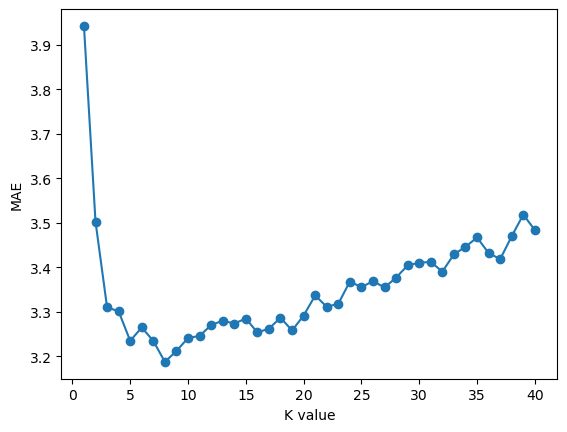

In [98]:
# compute MAE for range of k values
k_range = np.arange(1, 41)
kvals = []
mae_score = []

for k in k_range:
    mae = test2(jester_data_df, 0.2, simMat_pearson, k)
    print('k={}, mae={}'.format(k, mae))
    kvals.append(k)
    mae_score.append(mae)

# plot results
%matplotlib inline
plt.plot(kvals, mae_score, '-o')
plt.xlabel('K value')
plt.ylabel('MAE')
plt.show();

In [100]:
def item_based_recommend(dataMat, simMat, user, k, N=3):
    unratedItems = np.nonzero(dataMat[user,:]==0)[0]
    if len(unratedItems) == 0: return 'you rated everything'
    itemScores = []
    for item in unratedItems:
        estimatedScore = item_based_predict(dataMat, simMat, user, item, k)
        itemScores.append((item, estimatedScore))
    return sorted(itemScores, key=lambda jj: jj[1], reverse=True)[:N]

In [102]:
# find best k and generate recommendations
best_k = kvals[np.argmin(mae_score)]
print(f'\nBest k: {best_k}')

# Generate recommendations
N = 3
user_index = [117, 441]

for user in user_index:
    recommendations = item_based_recommend(jester_data_np, simMat_pearson, user, best_k, N)
    print('Top {} Recommended jokes for user {}:\n'.format(N, user))
    for r in recommendations:
        print('Joke # {}, predicted rating: {}'.format(r[0], r[1]))
        print(get_joke_text(jokes, r[0]), "\n")
    print('=========================================')


Best k: 8
Top 3 Recommended jokes for user 117:

Joke # 92, predicted rating: 12.424142277127839
Reaching the end of a job interview the human resources person asked a young engineer fresh out of Stanford"And what starting salary were you looking for?"The engineer said "In the neighborhood of $125000 a year depending on the benefits package."The interviewer said "Well what would you say to a package of 5-weeks vacation 14 paid holidays full medical and dental company matching retirement fund to 50% of salary and a company car leased every 2 years - say a red Corvette?"The Engineer sat up straight and said "Wow! Are you kidding?"And the interviewer replied "Yeah but you started it." 

Joke # 75, predicted rating: 11.949159151167953
There once was a man and a woman that both  got in  a terrible car wreck. Both of their vehicles  were completely destroyed buy fortunately no one  was   hurt.  In thankfulness the woman said to the man 'We are both okay so we should celebrate. I have   a  b

_I modified the cross_validate_user and test functions to work with the new item-based prediction function by creating cross_validate_user2 and test2 functions that accept a similarity matrix and k parameter. I tested the prediction accuracy using both Pearson and cosine similarity measures with k=10, which showed comparable performance to the original methods. Next, I computed MAE values across a range of k values from 1 to 40 to find the optimal k. The plot shows how prediction accuracy varies with k, where smaller k values may miss important similar items while larger k values may include less relevant items, affecting the weighted average. I identified the best k value that minimizes MAE from the plot. Finally, I modified the recommend function to create item_based_recommend that uses the item_based_predict function and generated top 3 recommendations for users 117 and 441 using the optimal k value. The results demonstrate that the model-based approach with precomputed similarities provides an efficient and scalable alternative to the original implementation._

### 2. **PCA for Reduced Dimensionality in Image Classification**

#### For this problem you will use an **image segmentation data set** for image classification. You will experiment with using PCA as an approach to reduce dimensionality and noise in the data. You will compare classification accuracies with and without PCA using the provided image class assignments as the class labels. You will also use machine Scikit-learn's pipelines to automate preprocessing, data transformation with PCA, and model optimization (using Random Forest). The data set is divided into three files. The file "segmentation_data.txt" contains data about images with each line corresponding to one image. Each image is represented by 19 features (these are the columns in the data and correspond to the feature names in the file "segmentation_names.txt". The file "segmentation_classes.txt" contains the class labels (the type of image) and a numeric class label for each of the corresponding images in the data file. The data set used in this problem is based on the Image Segmentation data set at the UCI Machine Learning Repository.

#### Your tasks in this problem are the following.

#### a. **[5 pts]** Load in the image data matrix (with rows as images and columns as features). Also load in the numeric class labels from the segmentation class file. Use scikit-learns's **train_test_split** to split the data into 80% training and 20% test sets. Use **random_state=99**. Scale the data using scikit-learn's **StandardScaler** (note that the scaler must only be fit to the training data and then used to transform both training and test sets).

In [187]:
# convert the segmentation feature names into list
segmentation_names = pd.read_csv('./segmentation_data/segmentation_names.txt', header=None)[0].tolist()
# used segmentation_names as header
segmentation_data = pd.read_csv('./segmentation_data/segmentation_data.txt', names=segmentation_names)

In [188]:
segmentation_data.head(5)

,REGION-CENTROID-COL,REGION-CENTROID-ROW,REGION-PIXEL-COUNT,SHORT-LINE-DENSITY-5,SHORT-LINE-DENSITY-2,VEDGE-MEAN,VEDGE-SD,HEDGE-MEAN,HEDGE-SD,INTENSITY-MEAN,RAWRED-MEAN,RAWBLUE-MEAN,RAWGREEN-MEAN,EXRED-MEAN,EXBLUE-MEAN,EXGREEN-MEAN,VALUE-MEAN,SATURATION-MEAN,HUE-MEAN
0,110.0,189.0,9,0.0,0.0,1.000000,0.666667,1.222222,1.186342,12.925926,10.888889,9.222222,18.666668,-6.111111,-11.111111,17.222221,18.666668,0.508139,1.910864
1,86.0,187.0,9,0.0,0.0,1.111111,0.720082,1.444444,0.750309,13.740741,11.666667,10.333334,19.222221,-6.222222,-10.222222,16.444445,19.222221,0.463329,1.941465
2,225.0,244.0,9,0.0,0.0,3.388889,2.195113,3.000000,1.520234,12.259259,10.333334,9.333334,17.111110,-5.777778,-8.777778,14.555555,17.111110,0.480149,1.987902
3,47.0,232.0,9,0.0,0.0,1.277778,1.254621,1.000000,0.894427,12.703704,11.000000,9.000000,18.111110,-5.111111,-11.111111,16.222221,18.111110,0.500966,1.875362
4,97.0,186.0,9,0.0,0.0,1.166667,0.691215,1.166667,1.005540,15.592592,13.888889,11.777778,21.111110,-5.111111,-11.444445,16.555555,21.111110,0.442661,1.863654


In [189]:
segmentation_classes = pd.read_csv('./segmentation_data/segmentation_classes.txt', delimiter='\t', names=['Class Label', 'Numeric Class Label'])
segmentation_classes.head(5)

,Class Label,Numeric Class Label
0,GRASS,0
1,GRASS,0
2,GRASS,0
3,GRASS,0
4,GRASS,0


In [190]:
X = segmentation_data.to_numpy()
y = segmentation_classes['Numeric Class Label'].to_numpy()

In [191]:
# split into train and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=99)
print(f'X_train shape: {X_train.shape}, y_train shape: {y_train.shape}')
print(f'X_test shape: {X_test.shape}, y_test shape: {y_test.shape}')

X_train shape: (1680, 19), y_train shape: (1680,)
X_test shape: (420, 19), y_test shape: (420,)


In [192]:
# scale the data using StandardScaler
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [193]:
X_train_scaled

array([[ 0.59485897, -1.37598744,  0.        , ...,  1.8646522 ,
        -0.56967834, -0.57579514],
       [-0.48290825, -0.92247132,  0.        , ..., -0.3823287 ,
        -0.0435137 , -0.18061726],
       [ 1.37248848,  1.1532371 ,  0.        , ...,  0.32655589,
        -0.57761353, -0.43228222],
       ...,
       [ 1.08599339,  0.15899021,  0.        , ..., -1.01273892,
         2.53984284, -0.47655931],
       [-1.1650394 , -1.44575915,  0.        , ..., -0.35355475,
         0.02618273, -0.26780653],
       [ 1.49527208, -0.32941177,  0.        , ..., -0.58897766,
        -0.32026624, -0.52001035]], shape=(1680, 19))

In [194]:
X_test_scaled

array([[ 0.8540688 , -0.45151226,  0.        , ..., -0.08935795,
        -0.71005015, -0.38982968],
       [ 0.58121634,  1.06602246,  0.        , ...,  0.52797318,
        -0.5469959 , -0.42068177],
       [-0.11455743, -1.48064501,  0.        , ...,  2.29887658,
        -1.07498517, -0.63285068],
       ...,
       [ 1.65898356,  1.99049764,  0.        , ..., -0.72761562,
         0.7563016 ,  2.25332966],
       [-0.89218694, -0.25964006,  0.        , ..., -0.8557903 ,
         1.94006567, -0.59906246],
       [-0.53747874, -0.6608274 ,  0.        , ...,  1.86726811,
        -0.77265689, -0.63787268]], shape=(420, 19))

#### b. **[10 pts]** Next, perform PCA on the scaled image train data. You may use the linear algebra package in Numpy or the Decomposition module in scikit-learn (the latter is much more efficient). Analyze the principal components to determine the smallest number, r, of PCs needed to capture at least 95% of variance in the data. Provide a Scree plot of PC variances. Note the optimal number of components for the next step.

In [195]:
# perform PCA on the scaled image train data
from sklearn.decomposition import PCA

# fit PCA on scaled training data
pca = PCA()
pca.fit(X_train_scaled)

np.set_printoptions(precision=3, suppress=True)
print(pca.explained_variance_ratio_)

[0.423 0.163 0.099 0.059 0.051 0.05  0.041 0.031 0.03  0.022 0.014 0.009
 0.007 0.    0.    0.    0.    0.    0.   ]


In [196]:
# calculate cumulative explained variance by PCA
np.set_printoptions(precision=3, suppress=True)
cumulative_variance = np.cumsum(pca.explained_variance_ratio_)
cumulative_variance

array([0.423, 0.586, 0.686, 0.745, 0.796, 0.845, 0.886, 0.918, 0.948,
       0.97 , 0.984, 0.993, 1.   , 1.   , 1.   , 1.   , 1.   , 1.   ,
       1.   ])

In [197]:
# determine the smallest number (r) of PCs needed to capture at least 95% of variance in the data
r = np.searchsorted(cumulative_variance, 0.95)
print(f"Smallest number of components for 95% variance: {r}")

Smallest number of components for 95% variance: 9


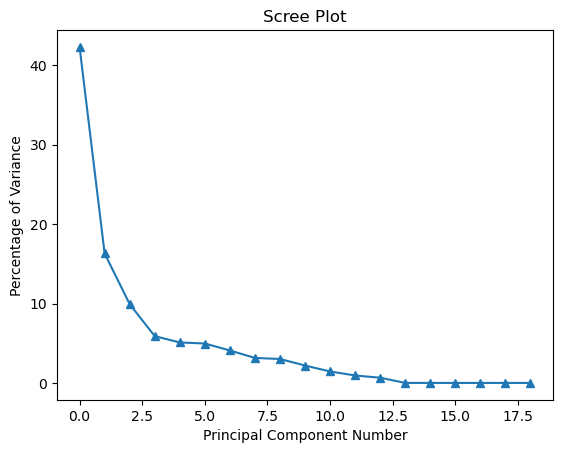

In [198]:
varPercentage = pca.explained_variance_ratio_*100
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(range(len(varPercentage)), varPercentage[:], marker='^')
plt.xlabel('Principal Component Number')
plt.ylabel('Percentage of Variance')
plt.title('Scree Plot')
plt.show()

#### c. **[10 pts]** Create a **RandomForest** model object (without fitting it to the training data) using the following parameters: **RandomForestClassifier(n_estimators=10, random_state=33)**. Also create a new StandardScaler object and a new PCA object (with the optimum number of components, r) without fitting these to the training data. Next, using either **make_pipeline()** or **Pipeline** from the **sklearn.pipeline** module, create two separate model pipelines, one with the sequence **StandardScaler --> RandomForestClassifier** and another with the sequence **StandardScaler --> PCA --> RandomForestClassifier**. Fit both model pipelines to the original, non-scaled, training data. For example, fitting the second model to the train data may result in this output.

In [208]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import make_pipeline

# create RandomForest model object (without fitting it to the training data)
rf_clf_1 = RandomForestClassifier(n_estimators=10, random_state=33)
rf_scaler_1 = StandardScaler()

rf_clf_2 = RandomForestClassifier(n_estimators=10, random_state=33)
rf_scaler_2 = StandardScaler()
rf_pca_2 = PCA(n_components=r)

In [209]:
# StandardScaler --> RandomForestClassifier
pipeline1 = make_pipeline(rf_scaler_1, rf_clf_1)

# StandardScaler --> PCA --> RandomForestClassifier
pipeline2 = make_pipeline(rf_scaler_2, rf_pca_2, rf_clf_2)

In [210]:
# fit both model pipelines to the original, non-scaled, training data
pipeline1.fit(X_train, y_train)

,steps,"[('standardscaler', ...), ('randomforestclassifier', ...)]"
,transform_input,None
,memory,None
,verbose,False
,copy,True
,with_mean,True
,with_std,True
,n_estimators,10
,criterion,'gini'
,max_depth,None
,min_samples_split,2


In [211]:
pipeline2.fit(X_train, y_train)

,steps,"[('standardscaler', ...), ('pca', ...), ...]"
,transform_input,None
,memory,None
,verbose,False
,copy,True
,with_mean,True
,with_std,True
,n_components,np.int64(9)
,copy,True
,whiten,False
,svd_solver,'auto'


#### d. **[10 pts]** Use scikit-learn's cross_val_score function to measure the overall classification accuracies for both models using 10-fold cross-validation on the original, non-scaled training data. In each case, compare the cross-validation accuracy to the accuracy of the model on the training data (using the two trained models from part (c).

In [212]:
from sklearn.model_selection import cross_val_score

# 10-fold cross-validation on original, non-scaled training data
cv_scores_pipeline1 = cross_val_score(pipeline1, X_train, y_train, cv=10)
cv_scores_pipeline2 = cross_val_score(pipeline2, X_train, y_train, cv=10)

In [213]:
print('Pipeline 1 (StandardScaler --> RandomForest): ')
print(f'Cross-validation accuracy: {cv_scores_pipeline1.mean():.4f}')
print(f'Training accuracy: {pipeline1.score(X_train, y_train):.4f}')

Pipeline 1 (StandardScaler --> RandomForest): 
Cross-validation accuracy: 0.9685
Training accuracy: 0.9988


In [214]:
print('Pipeline 2 (StandardScaler --> PCA --> RandomForest):')
print(f'Cross-validation accuracy: {cv_scores_pipeline2.mean():.4f}')
print(f'Training accuracy: {pipeline2.score(X_train, y_train):.4f}')

Pipeline 2 (StandardScaler --> PCA --> RandomForest):
Cross-validation accuracy: 0.9143
Training accuracy: 0.9982


#### e. **[15 pts]** Next, set up a new three-step pipeline using scikit-learn's **Pipeline()** function with standard scaler, PCA (with the optimum number of components from part (b)), and a default RandomForest Classifier (**RandomForestClassifier(random_state = 77)**) as the pipeline steps. Create a GridSearchCV parameter grid with the following parameters: **n_estimators** (from 1 to 200 in increments of 5), **max_depth** (with the list of values: [1, 5, 10, 15, 20, 25]), and **min_samples_split** (with values: [2, 3, 4, 5]). Create a GridSearchCV object using this pipeline, the parameter grid, and 5-fold cross-validation. Then, run the grid search on the original non-scaled data. Report the best parameters and the overall cross-validation accuracy resulting from the grid search. Finally, create a new 3-step pipeline, as before, but with the RandomForest Classifier parameters set to the optimal values reported from the grid search. Fit this new model to the original training data, then compare the training accuracy with the accuracy on the set aside non-scaled test data from part (a).

In [215]:
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline

# create parameter grid
param_grid = {
    'randomforestclassifier__n_estimators': range(1, 201, 5),
    'randomforestclassifier__max_depth': [1, 5, 10, 15, 20, 25],
    'randomforestclassifier__min_samples_split': [2, 3, 4, 5]
}

# three-step pipeline using scikit-learn's Pipeline() function
rf_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('pca', PCA(n_components=r)),
    ('randomforestclassifier', RandomForestClassifier(random_state=77))
])

In [ ]:
# create GridSearchCV object
grid_search = GridSearchCV(rf_pipeline, param_grid, cv=5)

# run the grid search on the original non-scaled data
grid_search.fit(X_train, y_train)

In [ ]:
print(f'Best parameters: {grid_search.best_params_}')
print(f'Best cross-validation accuracy: {grid_search.best_score_:.4f}')